# Sweep

<img style="float: right" src="img/1.title.gif" width="600">

Bei der Filterkonstruktion ist es häufig erforderlich, die Frequenzeigenschaften des Filters zu kennen. Durch Messen der Impulsantwort des Filters können die Frequenzeigenschaften genau erhalten werden. Wenn jedoch keine genauen Berechnungen der digitalen Impulsantwort möglich sind, können Sweepsignal verwendet werden, um die Frequenzeigenschaften des Systems zu messen.

Sweeps sind eine beliebte Methode im Bereich der Signalmessung, um die Änderung eines gemessenen Ausgabewerts über einen fortschreitenden Eingabeparameter zu beschreiben. In einem Sweepsignal wird die Frequenz der Wellenform kontinuierlich erhöht. Mit einem Sweepsignal können Sie den Frequenzgang kontinuierlich über das bestimmte Intervall und nicht nur in diskreten Frequenzintervallen untersuchen, wie dies durch die Mehrreihen- oder Mehrphasensignale getestet wird.

## Inhalt  
<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:right" width=64px><img src="img/1.1.jpg" style="float:left"></td>
        <td style="text-align:left" width=256px>
            <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#1'>
                1. Zeitsignal
            </a>
        </td>
    </tr>  
    <tr>
        <td style="text-align:right"><img src="img/1.2.jpg" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#2'>
                2. Spektrum
            </a>
        </td>
    </tr>
</table>

----

<a id='1'></a>
<div>
    <img src="img/1.1.jpg" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        1. Zeitsignal 
    </h2>
</div>

Ein Sweep $x(t)$ im Zeitbereich ist eine harmonische Schwingung mit zeitabhängigem Argument $\varphi (t)$, dessen Momentanfrequenz $\omega (t)$ mit der Zeit monoton zu- oder abnimmt:
\begin{equation*}
x(t)=x_{0}\sin (\varphi (t))\; \; mit \; \; \omega (t)=\frac{\mathrm{d} \varphi (t)}{\mathrm{d} t}\; \; 
\rightarrow \; \;  x(t)=x_{0}\sin (\int \omega (t)dt + \varphi_{0})
\end{equation*}  
In der Umgebung eines Zeitpunkts $t_{0}$ mit der Momentanfrequenz $\omega _{0}$ nähert sich $x(t)$ einer Sinusfunktion mit der Frequenz $\omega _{0}$ an.
Bei einem linearen Sweep ändert sich die Momentanfrequenz
innerhalb eines Zeitintervalls $T$ linear von einer Startfrequenz $\omega_{1}$ zu
einer Zielfrequenz $\omega _{2}$, daher:
\begin{equation*}
x(t)=x_{0}\sin (\omega_{1}t+\frac{\omega_{1}-\omega_{1}}{2T}t^{2})
\end{equation*} 

In der Übung 6.1 haben wir den Sweep berechnet, nun implementieren und veranschaulichen wir es. 

Zuerst konfieguieren wir die Abtastfrequenz, Start- und Endfrequenz usw.:

In [ ]:
'''
Parameter Konfiguieren
'''
import numpy as np

fs_Hz = 16e3  # Abtastfrequenz (beliebig)
dt_s = 1/fs_Hz  # Zeitintervall
f_start_Hz = 200  # Startfrequenz [Hz]
f_end_Hz = 1000  # Endfrequenz [Hz]
omega1_rad_per_s = f_start_Hz * 2 * np.pi  # Startfrequenz [rad]
omega2_rad_per_s = f_end_Hz * 2 * np.pi  # Endfrequenz [rad]
omega_m_rad_per_s = (omega1_rad_per_s + omega2_rad_per_s) / 2  # Mittenfrequenz [Hz]

Anschließend definieren wir einige Inline-Funktionen mittels [lambda](https://www.w3schools.com/python/python_lambda.asp) von Zeit, Phasen sowie Amplituden zur Vereinfachung:

In [ ]:
'''
Inline-Funktionen definieren (mittels "lambda")
'''
# Zeitfunktion
T = lambda n: 2*n*np.pi*16 / (7*omega1_rad_per_s + omega2_rad_per_s)  
T_s = T(300)  # die Dauer des Sweeps

# Phasenwinkelfunktion
k = 3/T_s * (omega2_rad_per_s - omega1_rad_per_s)  
phi1_func = lambda t: (omega2_rad_per_s - omega1_rad_per_s) \
                      / T_s**3 * t**4 + omega1_rad_per_s*t
phi2_func =  lambda t: k * t**4 / (3 * T_s**2) - 4*k / (3*T_s) * t**3 \
                       + 2*k * t**2 - k*T_s*t + omega1_rad_per_s*t \
                       + 7*k/48 * T_s**2 - omega1_rad_per_s*T_s/2
phi2_0 = lambda T_s: 13/24 * k * T_s**2

# Amplitudenfunktion
A1_func = lambda t: 2/T_s*t
A2_func = lambda t: -2/T_s*(t-T_s)
center_time_s = T_s/2

Jetzt können wir den Sweep damit berechnen und plotten:

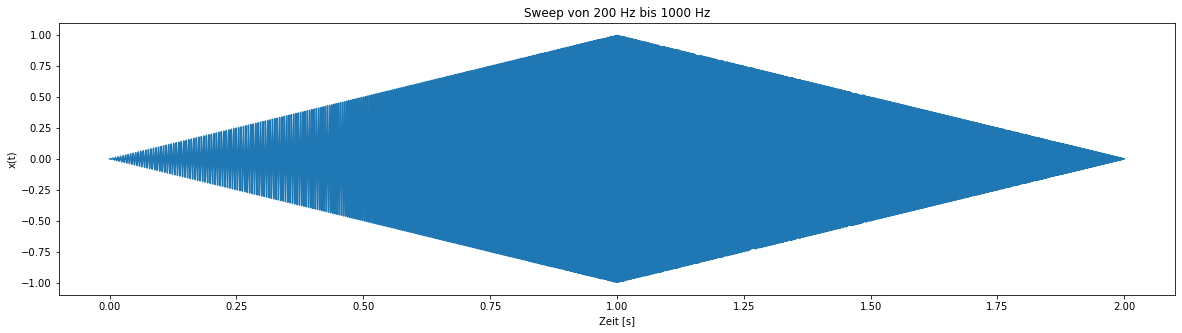

In [3]:
'''
Aufgabe: Inplementieren des Sweeps nach Übung 6.1
'''
import matplotlib.pyplot as plt

# Parameter bestimmen
t1_s = np.linspace(0, T_s/2, int(fs_Hz*T_s/2))
t2_s = np.linspace(T_s/2+dt_s, T_s, int(fs_Hz*T_s/2-1))
phi1 = phi1_func(t1_s)
phi2 = phi2_func(t2_s)
A1 = A1_func(t1_s)
A2 = A2_func(t2_s)

# Sweep bestimmen
sweep1 = A1 * np.sin(phi1)
sweep2 = A2 * np.sin(phi2)
t_s = np.append(t1_s, t2_s)        
sweep = np.append(sweep1, sweep2)

# Plot
plt.title('Sweep von %d Hz bis %d Hz' %(f_start_Hz, f_end_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_s, sweep)
plt.gcf().set_size_inches(20, 5)
plt.show()

----

<a id='2'></a>
<div>
    <img src="img/1.2.jpg" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        2. Spektrum 
    </h2>
</div>

Statt im Zeitbereich können Sweeps auch im Frequenzbereich erzeugt werden. Die Grundlage dafür ist, dass für Sweeps die Gruppenlaufzeit einer Frequenzkomponente exakt der Zeitpunkt ist, an dem die jeweilige Momentanfrequenz im Zeitsignal auftritt. Ein Spektragramm gibt uns den Frequenzgang über die Zeit.

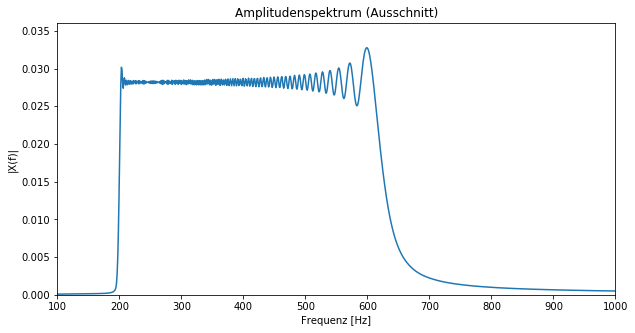

In [4]:
'''
Aufgabe: Spektrum des Sweeps berechnen
'''
from scipy import fftpack

# Parameter
N = int(2**(np.floor(np.log2(len(sweep)))))  # Länge von FFT
f_Hz = np.linspace(0, fs_Hz/2, int(N/2))  # Frequenzbereich

# FFT
sweep_fft = fftpack.fft(sweep, N)
sweep_fft_plot = np.abs(sweep_fft[:len(f_Hz)]) / int(N/2)

# Plot 
plt.title('Amplitudenspektrum (Ausschnitt)')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.plot(f_Hz, sweep_fft_plot)
plt.axis([f_start_Hz*0.5, f_end_Hz*1, 0, np.max(sweep_fft_plot)*1.1])
plt.gcf().set_size_inches(10, 5)
plt.show()

Zum Schluss können wir das Sweepsignal auch abspielen:

In [5]:
'''
Aufgabe: Sweep abspielen
'''
import numpy as np
import simpleaudio as sa

# Werte in 16-Bit-Daten konvertieren
sound = (sweep*(2**15-1)/np.max(np.abs(sweep))).astype(np.int16)

# Abspielen
play_obj = sa.play_buffer(sound, 1, 2, int(fs_Hz))
play_obj.wait_done()

----

<a id='2'></a>
<div>
    <h2 style="position: relative; top: 6px; left: 6px">
        *. Erweiterung 
    </h2>
</div>

Im Modul scipy ist die Funktion [signal.chirp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) als Frequenzgesteuerter Kosinusgenerator vorhanden, dadurch können Sweeps erzeugt werden:

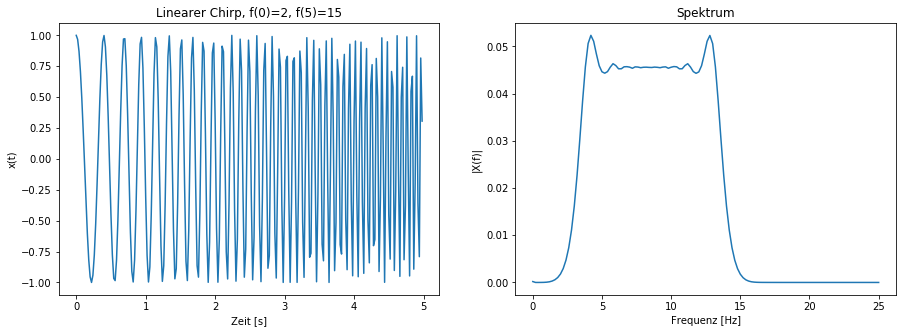

In [6]:
'''
Beispiel: Sweep mittels signal.chirp() erzeugen
'''
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
import simpleaudio as sa

# Konfiguieren
fs_chirp_Hz = 50
T_chirp_s = 5
t_chirp_s = np.linspace(0, T_chirp_s, T_chirp_s*fs_chirp_Hz, endpoint=False)
f_chirp_start_Hz = 2  
f_chirp_end_Hz = 15  

# Sweep und dessen Spektrum erstellen
x_t = chirp(t_chirp_s, f_chirp_start_Hz, T_chirp_s, f_chirp_end_Hz, 'linear')
f_chirp_Hz, t_chirp, X_f = spectrogram(x_t, fs_chirp_Hz, nperseg=250)

# Plot
plt.subplot(121)
plt.title('Linearer Chirp, f(0)=%d, f(%d)=%d' %(f_chirp_start_Hz, T_chirp_s, f_chirp_end_Hz))
plt.xlabel('Zeit [s]') 
plt.ylabel('x(t)') 
plt.plot(t_chirp_s, x_t)
plt.subplot(122)
plt.title('Spektrum')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.plot(f_chirp_Hz, X_f)
plt.gcf().set_size_inches(15, 5)
plt.show()

----

### References

1. Titelbild von [wikimedia](https://commons.wikimedia.org/wiki/File:Chirp_animation.gif?uselang=de)  
2. [Sweep (Signalverarbeitung)](https://de.wikipedia.org/wiki/Sweep_(Signalverarbeitung))  
3. [Sinusoidal Sweep Signals](https://learn.digilentinc.com/Documents/132)  
4. [Sine Sweep](https://theaudioprogrammer.com/signal-analysis-ii-linear-vs-logarithmic-sine-sweep/)  